### data.lacity.org API

In [77]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
from config import password, username
import datetime
import dateutil
import scipy.stats as stats

In [12]:
#hold cell for tokenized requests
    #unauthenticated client only works with public data sets. Note 'None'
        #in place of application token, and no username or password:
        #client = Socrata("data.lacity.org", None)

#authenticated client request (needed for non-public datasets):
client = Socrata("data.lacity.org",
    app_token="hdI22XaCHRYX4ZbAtX4tMtBMi",
    username=username,
    password=password)

#first 100,000 results, returned as JSON from API / converted to Python list of
#dictionaries by sodapy
results = client.get("63jg-8b9z", limit=100000)

#convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

,area,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,13,Newton,900,900,NaN,NaN,NaN,VIOLATION OF COURT ORDER,NaN,2010-02-20T00:00:00.000,...,SINGLE FAMILY DWELLING,1385,AA,Adult Arrest,1350,48,H,M,NaN,NaN
1,14,Pacific,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",MANCHESTER AV,2010-09-12T00:00:00.000,...,STREET,1485,IC,Invest Cont,0045,0,W,M,NaN,NaN
2,13,Newton,946,946,NaN,NaN,NaN,OTHER MISCELLANEOUS CRIME,NaN,2010-08-09T00:00:00.000,...,ALLEY,1324,IC,Invest Cont,1515,0,H,M,NaN,NaN
3,06,Hollywood,900,900,998,NaN,NaN,VIOLATION OF COURT ORDER,HOLLYWOOD BL,2010-01-05T00:00:00.000,...,STREET,0646,IC,Invest Cont,0150,47,W,F,HAND GUN,102
4,01,Central,122,122,NaN,NaN,NaN,"RAPE, ATTEMPTED",SAN PEDRO ST,2010-01-02T00:00:00.000,...,ALLEY,0176,IC,Invest Cont,2100,47,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400


In [13]:
#select only required fields for analysis
subset_df = results_df.loc[:,('area', 'area_name', 'crm_cd', 'crm_cd_desc', 'date_occ', 'date_rptd', 'dr_no', 'lat', 'lon', 'location', 'mocodes', 'premis_cd', 'rpt_dist_no', 'time_occ')]
subset_df.head()
# subset_df.info()
# subset_df.shape

,area,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,lat,lon,location,mocodes,premis_cd,rpt_dist_no,time_occ
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100


In [14]:
#rename columns
subset_df.rename(
  columns={
    #0 : 'title',
    #1 : 'author'
    'area': 'Area ID', 
    'area_name': 'Area Name',
    'crm_cd': 'Crime Code',
    'crm_cd_desc': 'Crime Code Description',
    'date_occ': 'Date Occurred',
    'date_rptd': 'Date Reported',
    'dr_no': 'DR #',
    'lat': 'Latitude',
    'lon': 'Longitude',
    'location': 'Location',
    'mocodes': 'MO Code',
    'premis_cd': 'Premise Code',
    'rpt_dist_no': 'Reporting District',
    'time_occ': 'Time Occurred'
  },
  inplace=True
)
subset_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100
5,01,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),2010-01-04T00:00:00.000,2010-01-05T00:00:00.000,100100506,34.0480,-118.2577,700 W 7TH ST,0344 1402,404,0162,1650
6,01,Central,330,BURGLARY FROM VEHICLE,2010-01-07T00:00:00.000,2010-01-08T00:00:00.000,100100508,34.0389,-118.2643,PICO BL,0344,101,0182,2005
7,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-08T00:00:00.000,2010-01-09T00:00:00.000,100100509,34.0435,-118.2427,500 CROCKER ST,0416,710,0157,2100
8,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-09T00:00:00.000,2010-01-09T00:00:00.000,100100510,34.0450,-118.2640,800 W OLYMPIC BL,0400 0416,108,0171,0230
9,01,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",2010-01-06T00:00:00.000,2010-01-09T00:00:00.000,100100511,34.0538,-118.2488,200 S OLIVE ST,0344 1402,710,0132,2100


In [15]:
#select only Crime Code for Burglary, code 310 or "BURGLARY"
burglary_df = subset_df.loc[subset_df['Crime Code Description'] == 'BURGLARY']
burglary_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25T00:00:00.000,2010-02-25T00:00:00.000,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23T00:00:00.000,2010-03-25T00:00:00.000,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05T00:00:00.000,2010-05-05T00:00:00.000,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10T00:00:00.000,2010-05-10T00:00:00.000,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15T00:00:00.000,2010-06-05T00:00:00.000,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000
203,01,Central,310,BURGLARY,2010-05-12T00:00:00.000,2010-06-05T00:00:00.000,100101001,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,2100
217,01,Central,310,BURGLARY,2010-06-12T00:00:00.000,2010-06-13T00:00:00.000,100101035,34.0394,-118.2496,800 SAN JULIAN ST,0344 0358 1609,203,0176,2058
251,01,Central,310,BURGLARY,2010-06-28T00:00:00.000,2010-06-29T00:00:00.000,100101139,34.0482,-118.2472,400 S MAIN ST,0344 1606,502,0145,1000
314,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101319,34.0413,-118.2517,300 E 8TH ST,0344 1307 1609,402,0176,1730
315,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101320,34.0413,-118.2517,300 E 8TH ST,0324,203,0176,1730


In [16]:
#cleanup date format
burglary_df["Date Occurred"] = pd.to_datetime(burglary_df["Date Occurred"])
burglary_df["Date Reported"] = pd.to_datetime(burglary_df["Date Reported"])
burglary_df.head()
# df.shape()


,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000


In [17]:
#select rows for only 2015 to Present
    #if needed, maybe we work with the full dataset

In [18]:
#copy dataframe for creating a working copy
month_df = burglary_df.copy()

In [19]:
#Hypothesis 1: the number of instances of burglary increase during the summer months
    #compare monthly count of burglaries
    #what does apply do?
        #take every item in test_df, apply the function in lambda and then create a series with the output
month_df["date_occurred_month"] = month_df["Date Occurred"].apply(lambda d: d.month)
month_df["date_occurred_month"].head()

49     2
87     3
149    5
161    5
202    5
Name: date_occurred_month, dtype: int64

In [20]:
#Hypothesis 1: appending lambda list of months to main DF 
burglary_df["Occurrence Month"] = month_df["date_occurred_month"] 
burglary_df.head()

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred,Occurrence Month
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030,2
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125,3
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500,5
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105,5
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000,5


In [21]:
#Hypothesis 1: calculate the count of months
month_counts_df = burglary_df["Occurrence Month"].value_counts()
month_counts_df


1     704
10    647
12    622
7     596
11    595
2     593
8     577
3     575
5     575
9     568
4     564
6     524
Name: Occurrence Month, dtype: int64

KeyError: 'Occurrence Month'

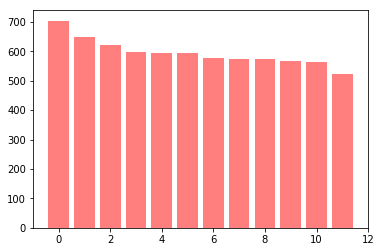

In [22]:
#Hypothesis 1: create bar chart of counts
x_axis = np.arange(len(month_counts_df))
tick_locations = [value for value in x_axis]

#create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, month_counts_df, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, month_counts_df["Occurrence Month"], rotation="vertical")

In [23]:
#Hypothesis 1: Create report of statistic variance for months of June, July, August
    #prove or disprove hypothesis that more crimes occur during the summer months
    #t-tests
        #t-tests allow you to compare your sample mean to the population mean
            #assumptions
                #data is normally distributed
                #data is independent
                #data is randomly sampled
#select rows 6, 7, 8 from the series (June, July, August)
sample = month_counts_df.data.iloc[6,7,8]
stats.ttest_1samp(sample, month_counts_df.mean())

AttributeError: 'memoryview' object has no attribute 'iloc'

In [24]:
#Hypothesis 2: most burglaries occur during daytime hours (Ed)
        #compare time of occurrance
        #time_frame _0500_1200
        #time_frame _1200 - 2200
        #time_frame _2200 - 0500

#Changed DF to a more granular Datafields
new_burglary_df = burglary_df[["Area Name", "Crime Code Description", "Date Occurred", "Date Reported", "DR #", "Latitude", "Longitude", "Location", "Time Occurred", "Occurrence Month"]].reset_index(drop=True)


# time_frame _0500_1200 = new_burglary_df[(time_frame _0500_1200["Time Occurred"] <10]
#loteens = purchase_data[(purchase_data["Age"] >=10) & (purchase_data["Age"] <=14)]
#hiteens = purchase_data[(purchase_data["Age"] >=15) & (purchase_data["Age"] <=19)]
#lotwent = purchase_data[(purchase_data["Age"] >=20) & (purchase_data["Age"] <=24)]
#hitwent = purchase_data[(purchase_data["Age"] >=25) & (purchase_data["Age"] <=29)]
#lothirt = purchase_data[(purchase_data["Age"] >=30) & (purchase_data["Age"] <=34)]
#hithirt = purchase_data[(purchase_data["Age"] >=35) & (purchase_data["Age"] <=39)]
#loforty = purchase_data[(purchase_data["Age"] >=40) & (purchase_data["Age"] <=44)]
#hiforty = purchase_data[(purchase_data["Age"] >=45) & (purchase_data["Age"] <=49)]
#fullcount = purchase_data["SN"].nunique()

#age_demo_df = pd.DataFrame({"Age": ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"],
                        #"Percentage of Players": [(tenyears["SN"].nunique()/fullcount)*100, (loteens["SN"].nunique()/fullcount)*100, (hiteens["SN"].nunique()/fullcount)*100, (lotwent["SN"].nunique()/fullcount)*100, (hitwent["SN"].nunique()/fullcount)*100, (lothirt["SN"].nunique()/fullcount)*100, (hithirt["SN"].nunique()/fullcount)*100, (loforty["SN"].nunique()/fullcount)*100, (hiforty["SN"].nunique()/fullcount)*100],
                        #"Total Count": [tenyears["SN"].nunique(), loteens["SN"].nunique(), hiteens["SN"].nunique(), lotwent["SN"].nunique(), hitwent["SN"].nunique(), lothirt["SN"].nunique(), hithirt["SN"].nunique(), loforty["SN"].nunique(), hiforty["SN"].nunique()]
                       #})
# burglary_df
# new_burglary_df.shape
# type(new_burglary_df)
new_burglary_df

,Area Name,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month
0,Central,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0030,2
1,Central,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0125,3
2,Central,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,1500,5
3,Central,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,1105,5
4,Central,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,1000,5
5,Central,BURGLARY,2010-05-12,2010-06-05,100101001,34.0444,-118.2628,700 W OLYMPIC BL,2100,5
6,Central,BURGLARY,2010-06-12,2010-06-13,100101035,34.0394,-118.2496,800 SAN JULIAN ST,2058,6
7,Central,BURGLARY,2010-06-28,2010-06-29,100101139,34.0482,-118.2472,400 S MAIN ST,1000,6
8,Central,BURGLARY,2010-08-06,2010-08-07,100101319,34.0413,-118.2517,300 E 8TH ST,1730,8
9,Central,BURGLARY,2010-08-06,2010-08-07,100101320,34.0413,-118.2517,300 E 8TH ST,1730,8


In [25]:
new_burglary_df.loc[(new_burglary_df["Date Occurred"] == 2010), ["Date Occurred", "Crime Code Description"]]

,Date Occurred,Crime Code Description


In [27]:
#Hypothesis 3: most burglaries occur during weekdays


    #convert a date to day of the week
  
    #use pandas.DatetimeIndex.dayofweek function
    
    #0=Monday, 6= Sunday
    

burglary_df["Day of Week"] = burglary_df["Date Occurred"].dt.dayofweek

#change the order of "Day of week" column from last to the 4th, which is right after the date occurred

burglary_df = burglary_df[["Area Name", 
                           "Crime Code Description", 
                           "Date Occurred", 
                           "Day of Week",
                           "Date Reported", 
                           "DR #", 
                           "Latitude", 
                           "Longitude", 
                           "Location", 
                           "Time Occurred", 
                           "Occurrence Month"]].reset_index(drop=True)

burglary_df


    

,Area Name,Crime Code Description,Date Occurred,Day of Week,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month
0,Central,BURGLARY,2010-02-25,3,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0030,2
1,Central,BURGLARY,2010-03-23,1,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0125,3
2,Central,BURGLARY,2010-05-05,2,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,1500,5
3,Central,BURGLARY,2010-05-10,0,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,1105,5
4,Central,BURGLARY,2010-05-15,5,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,1000,5
5,Central,BURGLARY,2010-05-12,2,2010-06-05,100101001,34.0444,-118.2628,700 W OLYMPIC BL,2100,5
6,Central,BURGLARY,2010-06-12,5,2010-06-13,100101035,34.0394,-118.2496,800 SAN JULIAN ST,2058,6
7,Central,BURGLARY,2010-06-28,0,2010-06-29,100101139,34.0482,-118.2472,400 S MAIN ST,1000,6
8,Central,BURGLARY,2010-08-06,4,2010-08-07,100101319,34.0413,-118.2517,300 E 8TH ST,1730,8
9,Central,BURGLARY,2010-08-06,4,2010-08-07,100101320,34.0413,-118.2517,300 E 8TH ST,1730,8


In [51]:


#count number of  bulglaries occurence on each day
# sort by value counts from largest to smallest
day_counts = burglary_df["Day of Week"].value_counts()
day_counts



4    1313
3    1113
2    1084
1    1072
0     965
5     841
6     752
Name: Day of Week, dtype: int64

In [52]:
#add actual index column using reset index function 
#and rearrange the order from monday to sunday

day_counts = day_counts.reset_index(name = "counts")
day_counts

,index,counts
0,4,1313
1,3,1113
2,2,1084
3,1,1072
4,0,965
5,5,841
6,6,752


In [31]:
#sort by day of week
#create a day of week, and day counts dictionary
data_dict = {'Day' : day_counts["index"], 'counts' : day_counts["counts"]}

#create a day counts dataframe and sort by day of week from monday to sunday
day_counts_df = pd.DataFrame(data_dict)
day_counts_df = day_counts_df.sort_values(by=['Day'],ascending=True)

day_counts_df

,Day,counts
4,0,965
3,1,1072
2,2,1084
1,3,1113
0,4,1313
5,5,841
6,6,752


In [32]:
#convert num day to name day

day_counts_df["Day"] = day_counts_df["Day"].replace({0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

day_counts_df



,Day,counts
4,Mon,965
3,Tues,1072
2,Weds,1084
1,Thurs,1113
0,Fri,1313
5,Sat,841
6,Sun,752


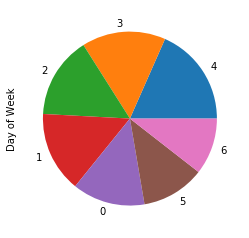

In [47]:
#create a pie chart to see the percentage of occurence per day in a week
burglary_df["Day of Week"].value_counts().plot(kind='pie')

#no visable difference in percentage 
    #not a good choice to see trend/ percentage, but still meaningful to get the following conclusion
    
        #dataset/ number of occurence is relatively small
        #there is a differencce and correlation between day of week and num of occurence,
        #but difference in the number of occurrences is not very large
        

In [48]:
#more visible pie chart with more information and with Sunday, Saturday exploded out
        
# Labels for the sections of our pie chart
labels = ["Mon", "Tues", "Weds", "Thurs", "Fri", "Sat", "Sun"]

# The values of each section of the pie chart
sizes = [965, 1072, 1082, 1113, 1313, 841, 752]

# The colors of each section of the pie chart
colors = ["red", "orange", "yellow", "green","blue", "indigo", "violet"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0,0,0.2,0.2)

([<matplotlib.patches.Wedge at 0x1a3610d9b0>,
 [Text(-1.0591402098406275, 0.29702191147918955, 'Mon'),
  Text(-0.8932708320444441, -0.641924622224936, 'Tues'),
  Text(0.0003765865752401291, -1.0999999355375214, 'Weds'),
  Text(0.9051365185012114, -0.625082300881657, 'Thurs'),
  Text(0.9840157751611933, 0.4916431167360283, 'Fri'),
  Text(0.2063717658967399, 1.2835149762432307, 'Sat'),
  Text(-0.6702633638088438, 1.113888245353031, 'Sun')],
 [Text(-0.5777128417312514, 0.16201195171592156, '13.5%'),
  Text(-0.4872386356606058, -0.3501407030317832, '15.0%'),
  Text(0.0002054108592218886, -0.599999964838648, '15.2%'),
  Text(0.49371082827338797, -0.3409539822990856, '15.6%'),
  Text(0.5367358773606509, 0.2681689727651063, '18.4%'),
  Text(0.12699800978260917, 0.7898553699958344, '11.8%'),
  Text(-0.41246976234390387, 0.6854696894480189, '10.5%')])

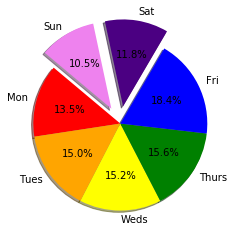

In [57]:

# Creates the pie chart based on the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=(0, 0, 0, 0,0,0.2,0.2), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#much easy to see, not straightforward enough to get conclusion

<BarContainer object of 7 artists>

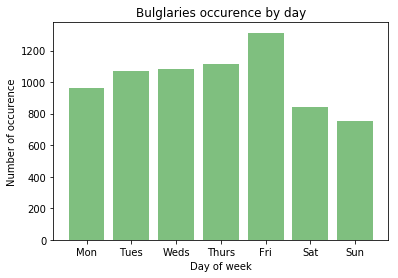

In [56]:
#create a bar chart to see the time of occurence on each day
#set x, y value
x_axis = day_counts_df["Day"]
y_axis = day_counts_df["counts"]

#set chart title, x lable, y label
plt.title("Bulglaries occurence by day")
plt.xlabel("Day of week")
plt.ylabel("Number of occurence")

plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")






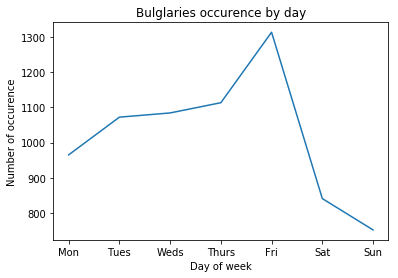

In [58]:
#create a line chart to see the trend of crime occurence in 7 days of a week
x_axis = day_counts_df["Day"]
y_axis = day_counts_df["counts"]

#set chart title, x lable, y label
plt.title("Bulglaries occurence by day")
plt.xlabel("Day of week")
plt.ylabel("Number of occurence")

plt.plot(x_axis, y_axis)

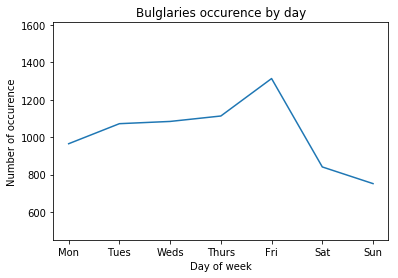

In [60]:
#optimize view of the line chart

#set y limits to see a bigger picture of the chart
plt.ylim(min(y_axis)-300, max(y_axis)+300)

#set chart title, x lable, y label
plt.title("Bulglaries occurence by day")
plt.xlabel("Day of week")
plt.ylabel("Number of occurence")


plt.plot(x_axis, y_axis)



